In [1]:
import numpy as np
import operator

from gridworld import GridWorld
from randomagent import RandomAgent
from qagent import Q_Agent


import matplotlib.pyplot as plt
%matplotlib inline

## Set Environment and Run Random Round

In [2]:
def play(environment, agent, trials=500, max_steps_per_episode=1000, learn=False):
    reward_per_episode = [] 
    
    for trial in range(trials): 
        cumulative_reward = 0 
        step = 0
        game_over = False
        while step < max_steps_per_episode and game_over != True: 
            old_state = environment.current_location
            action = agent.choose_action(environment.actions) 
            reward = environment.make_step(action)
            new_state = environment.current_location
            
            if learn == True: 
                agent.learn(old_state, reward, new_state, action)
                
            cumulative_reward += reward
            step += 1
            
            if environment.check_state() == 'TERMINAL': 
                environment.__init__()
                game_over = True     
                
        reward_per_episode.append(cumulative_reward) 
        
    return reward_per_episode 

In [3]:
env = GridWorld()
agent = RandomAgent()

print("Current position of the agent =", env.current_location)
print(env.agent_on_map())
available_actions = env.get_available_actions()
print("Available_actions =", available_actions)
chosen_action = agent.choose_action(available_actions)
print("Randomly chosen action =", chosen_action)
reward = env.make_step(chosen_action)
print("Reward obtained =", reward)
print("Current position of the agent =", env.current_location)
print(env.agent_on_map())

Current position of the agent = (4, 4)
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]]
Available_actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
Randomly chosen action = RIGHT
Reward obtained = -1.0
Current position of the agent = (4, 4)
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]]


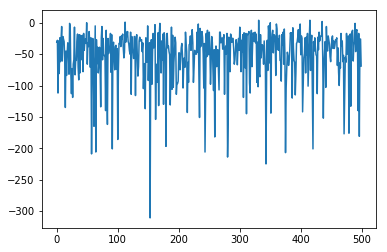

In [4]:
reward_per_episode = play(env, agent, trials=500)

# Simple learning curve
plt.plot(reward_per_episode)
plt.show()

### Run Environment with Q Learning

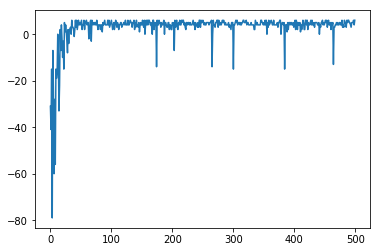

In [6]:
env = GridWorld()
agentQ = Q_Agent(env)

# Note the learn=True argument!
reward_per_episode = play(env, agentQ, trials=500, learn=True)

# Simple learning curve
plt.plot(reward_per_episode)
plt.show()

In [8]:
def clean(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            clean(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))


clean(agentQ.q_table)

(0, 0)
	UP
		-0.4
	DOWN
		-0.41
	LEFT
		-0.4
	RIGHT
		-0.38272969
(0, 1)
	UP
		-0.1
	DOWN
		-0.2
	LEFT
		-0.3
	RIGHT
		3.77261261552
(0, 2)
	UP
		3.09506775742
	DOWN
		4.1253428503
	LEFT
		0.355745718009
	RIGHT
		10.0
(0, 3)
	UP
		0
	DOWN
		0
	LEFT
		0
	RIGHT
		0
(0, 4)
	UP
		-0.1
	DOWN
		-0.1
	LEFT
		7.17570463519
	RIGHT
		-0.1
(1, 0)
	UP
		-0.555239
	DOWN
		-0.655961409
	LEFT
		-0.6
	RIGHT
		-0.561720298047
(1, 1)
	UP
		-0.3592
	DOWN
		-0.329189
	LEFT
		-0.41829
	RIGHT
		2.6340324322
(1, 2)
	UP
		9.0
	DOWN
		2.26891809394
	LEFT
		-0.0799852144213
	RIGHT
		-4.68559
(1, 3)
	UP
		0
	DOWN
		0
	LEFT
		0
	RIGHT
		0
(1, 4)
	UP
		2.66416406494
	DOWN
		-0.229
	LEFT
		-1.0
	RIGHT
		-0.2
(2, 0)
	UP
		-0.8641707999
	DOWN
		-0.90423024101
	LEFT
		-0.9
	RIGHT
		-0.743767138243
(2, 1)
	UP
		-0.62462
	DOWN
		-0.65444679558
	LEFT
		-0.70137781
	RIGHT
		4.60154105606
(2, 2)
	UP
		8.0
	DOWN
		3.45632913185
	LEFT
		1.04029215823
	RIGHT
		-0.243315012906
(2, 3)
	UP
		-1.0
	DOWN
		-0.788180379078
	LEFT
		